In [2]:
library(ISLR)

Warning message:
“package ‘ISLR’ was built under R version 3.4.4”

# Logistic Regression

Use the glm() function.

In [5]:
glm1 = glm(Direction ~ Lag1 + Lag2 + Lag3 +
                       Lag4 + Lag5 + Volume,
                       family = binomial, data = Smarket)

In [6]:
summary(glm1)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [8]:
coef(glm1)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

### Use the predict() function to predict

In [11]:
glm_probs = predict(glm1, type = "response")

In [12]:
head(glm_probs)

1         2         3         4         5         6 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565

The predictions here return raw probabilities.

# Hold out sets

In [14]:
attach(Smarket)

train=(Year <2005)
Smarket.2005= Smarket[!train ,]
Direction.2005= Direction[!train]

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



In [19]:
glm2 = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
          data = Smarket, family = binomial, subset = train)

In [23]:
glm.probs = predict(glm2, Smarket.2005, type= "response")

# Linear discriminant analysis

In [26]:
library(MASS)

In [30]:
lda1 = lda(Direction ~ Lag1 + Lag2,
          data = Smarket, subset = train)

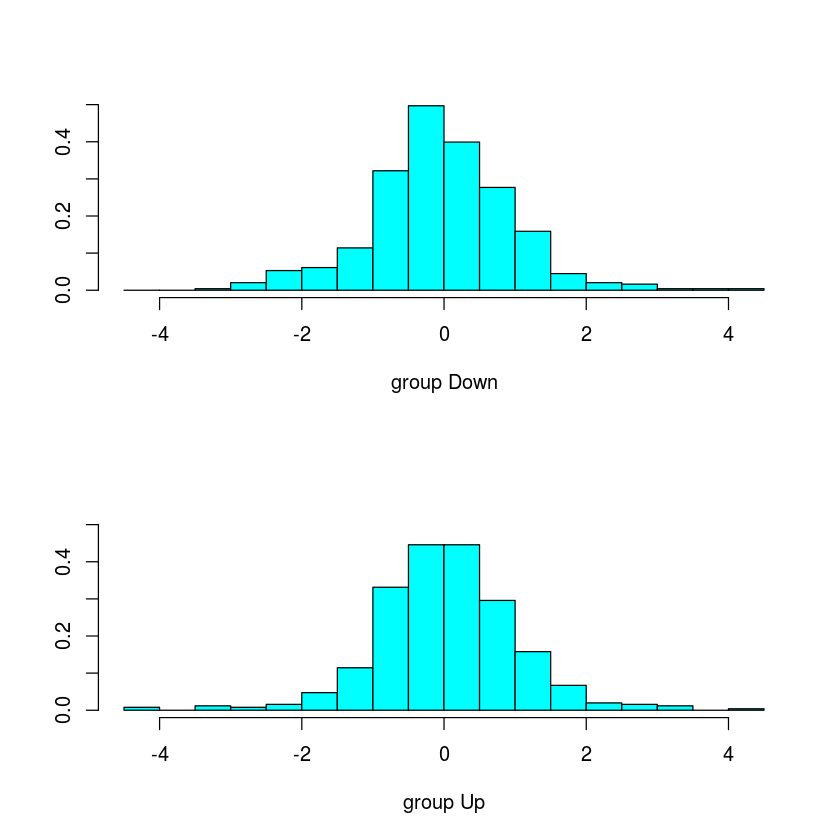

In [32]:
plot(lda1)

In [36]:
lda.pred = predict(lda1, Smarket.2005)

In [41]:
sum(lda.pred$posterior[,1] >= .6)

[1] 0

In [40]:
sum(lda.pred$posterior[,1] < .6)

[1] 252

# Quadratic discriminant analysis

In [42]:
qda1 = qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

In [43]:
qda1

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

# KNN

In [44]:
library(class)

train.X=cbind(Lag1 ,Lag2)[train ,]
test.X=cbind(Lag1 ,Lag2)[!train ,]
train.Direction =Direction [train]

In [45]:
knn.pred=knn(train.X,test.X,train.Direction ,k=1)

In [47]:
table(knn.pred ,Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83